In [1]:
import pandas as pd
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.append('./eval-algos/S7/models/')

from utils.allocator import AllocationConfig, allocate_with_constraints

In [2]:
## Onchain Builders

In [3]:
from onchain_builders import OnchainBuildersCalculator, SimulationConfig, load_config, load_data

ds, sim_cfg = load_config('eval-algos/S7/weights/onchain_builders_testing.yaml')
df_data = load_data(ds)

alloc = AllocationConfig(budget=1_000_000, min_amount_per_project=200, max_share_per_project=0.05)
sim_cfg.metric_variants.update({'Adoption': 1.0, 'Growth': 0, 'Retention': 0})
calculator = OnchainBuildersCalculator(sim_cfg)
analysis = calculator.run_analysis(df_data)

scores = analysis['final_results']['weighted_score']
scores.head(15)

project_id                                    project_name       display_name      
XSDgPwFuQVcj57ARcKTGrm2w80KKlqJxaBWF6jZqe7w=  uniswap            Uniswap               0.151791
2rDMrpL2LxAp8HdLsctM08faEhDFO6b_OJT0yXJhV9I=  aerodrome-finance  Aerodrome Finance     0.132189
9fdHUXUwgPfemopW3xPuCoLOk5tw7-KQXFgv8HVYtUI=  virtual-protocol   Virtuals Protocol     0.100445
PZA75rAKiN4P9poFNpkZYK-yrF1r3WgpEHmbvwPjbXk=  zora               Zora                  0.036450
NXrQCspmyubeAyhKPHl5gz8K7zkYOq7G3cSCPP5e31s=  layer3xyz          Layer3                0.035381
w7zsvZGUnkAgUKialQdqZQdKNtHmkaHWxBbfKy8Id98=  reservoirprotocol  Reservoir Protocol    0.034263
I1ULrUY9t789vj4akEP3lLgB9hmC1Unfg7875NEdWL0=  lifinance          LI.FI                 0.026413
HW-DsDcsApBwqtMlSu8S7BpNvtLdq5jvBrJD7kxz7pM=  safe-global        Safe                  0.022043
LOZXloZfVxGx7h5Na3R-5RcR86-mMDDJuKiE4q_hJOY=  metamask           Metamask              0.021982
o7Tegl37mRn3t51qS50mf-ENGA98ACIQV01Ae_NWWf0=  0xproj

<Axes: >

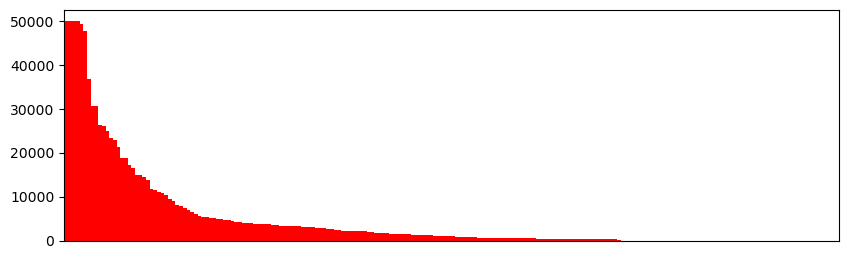

In [4]:
rewards = allocate_with_constraints(scores, alloc, print_results=False)
rewards.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='', color='red', width=1, figsize=(10,3))

In [5]:
## Devtooling

In [7]:
from devtooling_openrank import DevtoolingCalculator, SimulationConfig, load_config, load_data

ds, sim_cfg = load_config('eval-algos/S7/weights/devtooling_openrank_testing.yaml')
data = load_data(ds)

sim_cfg.time_decay.update(
    {
        'event_to_devtooling_repo': 0.5,
        'commit_to_onchain_repo': 0.5
    }
)
calculator = DevtoolingCalculator(sim_cfg)
analysis = calculator.run_analysis(*data)

scores = (
    analysis['devtooling_project_results']
    .set_index(['project_name','display_name'])
    ['v_aggregated']
    .sort_values(ascending=False)
)
scores = scores[scores>0]
scores.head(15)

INFO:root:eigentrust compute took 0.901938792085275 secs 


project_name  display_name 
ethers-io     ethers.js        0.166341
zora          Zora             0.120330
ethereumjs    EthereumJS       0.078127
across        Across           0.075676
defi-llama    DefiLlama        0.054684
smoldapp      Smol Dapp        0.048494
sushi         Sushi            0.045740
wevm          wevm             0.039727
synthetix     Synthetix        0.038861
openzeppelin  OpenZeppelin     0.036933
optimism      Optimism         0.033458
foundry       Foundry          0.025626
rainbow       Rainbow          0.021369
pyth-network  Pyth Network     0.015439
apeworx       Ape Framework    0.014647
Name: v_aggregated, dtype: float64

In [11]:
from devtooling_openrank import DevtoolingCalculator, SimulationConfig, load_config, load_data

ds, sim_cfg = load_config('eval-algos/S7/weights/devtooling_openrank_testing.yaml')
data = load_data(ds)

sim_cfg.time_decay.update({'event_to_devtooling_repo': 0.25, 'commit_to_onchain_repo': 0.25})
sim_cfg.onchain_project_pretrust_weights.update({
    'transaction_count_all_levels': 0.0,
    'transaction_count_txn_level_only': 1.0,
    'gas_fees_all_levels': 0.0,
    'gas_fees_txn_level_only': 0.0,
    'user_count': 0.0,
    'bot_filtered_user_count': 0.0
})

calculator = DevtoolingCalculator(sim_cfg)
analysis = calculator.run_analysis(*data)

scores = (
    analysis['devtooling_project_results']
    .set_index(['project_name','display_name'])
    ['v_aggregated']
    .sort_values(ascending=False)
)
scores = scores[scores>0]
scores.head(15)

INFO:root:eigentrust compute took 0.9050060000736266 secs 


project_name  display_name 
ethers-io     ethers.js        0.179357
zora          Zora             0.144038
ethereumjs    EthereumJS       0.094684
across        Across           0.081542
openzeppelin  OpenZeppelin     0.046946
smoldapp      Smol Dapp        0.043806
defi-llama    DefiLlama        0.041213
optimism      Optimism         0.038934
wevm          wevm             0.038339
foundry       Foundry          0.030294
rainbow       Rainbow          0.023582
pyth-network  Pyth Network     0.018807
apeworx       Ape Framework    0.016998
sushi         Sushi            0.016654
synthetix     Synthetix        0.014408
Name: v_aggregated, dtype: float64

<Axes: >

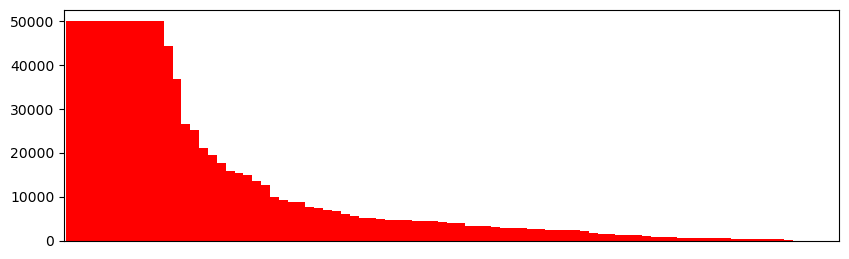

In [8]:
rewards = allocate_with_constraints(scores, alloc, print_results=False)
rewards.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='', color='red', width=1, figsize=(10,3))

In [9]:
rewards.head(15)

project_name  display_name 
ethers-io     ethers.js        50000.00
zora          Zora             50000.00
ethereumjs    EthereumJS       50000.00
across        Across           50000.00
defi-llama    DefiLlama        50000.00
smoldapp      Smol Dapp        50000.00
sushi         Sushi            50000.00
wevm          wevm             50000.00
synthetix     Synthetix        50000.00
openzeppelin  OpenZeppelin     50000.00
optimism      Optimism         50000.00
foundry       Foundry          44118.43
rainbow       Rainbow          36789.03
pyth-network  Pyth Network     26579.54
apeworx       Ape Framework    25215.46
Name: v_aggregated, dtype: float64

In [12]:
import openrank_sdk

In [13]:
et = openrank_sdk.EigenTrust()
et

In [14]:
et.alpha

0.5

In [16]:
analysis['onchain_projects_pretrust_scores']['v'].sum()

1.0